In [2]:
#Student ID: 1001420223
#Student name: Aaron Chen
#Instructor: Shion Guha
#Course code: INF2178
#Course name: Experimental Design for Data Science
#Faculty of Information
#University of Toronto
#Technical Assignment 3

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%pip install pingouin
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pingouin import ancova
%pip install bioinfokit
from bioinfokit.analys import stat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=a094b2c5f1cdeaa245e2441ea4b265bc8eacb6b98f27f266e0c3f6cfa48cc002
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load data from google drive (change path if needed)
dataset = pd.read_csv('/content/drive/MyDrive/inf2178/INF2178_A3_data.csv')

In [6]:
# get a over view of dataset
dataset.describe()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,35.954215,27.128244,23.073694,47.511178,37.799461,28.235584,54317.199930,54.317200,1.895165
std,10.473130,9.120505,7.396978,14.327111,12.027753,7.577457,36639.061147,36.639061,0.822692
min,21.010000,10.510000,6.985000,22.350000,11.900000,7.858000,1.000000,0.001000,1.000000
25%,29.340000,20.680000,17.385000,38.950000,29.270000,22.802000,27000.000000,27.000000,1.000000
50%,34.060000,25.680000,22.954000,45.320000,36.410000,28.583000,47000.000000,47.000000,2.000000
75%,39.890000,31.590000,28.305000,51.770000,44.220000,33.782000,72000.000000,72.000000,3.000000
max,138.510000,115.650000,47.691000,156.850000,113.800000,48.345000,150000.000000,150.000000,3.000000


In [7]:
# check null values
dataset.isna().any()

fallreadingscore               False
fallmathscore                  False
fallgeneralknowledgescore      False
springreadingscore             False
springmathscore                False
springgeneralknowledgescore    False
totalhouseholdincome           False
incomeinthousands              False
incomegroup                    False
dtype: bool

In [8]:
# count how many category in income group categorical variable
print('income group')
print(dataset['incomegroup'].unique())

income group
[3 2 1]


Text(0.5, 1.0, 'Figure 1: income group count')

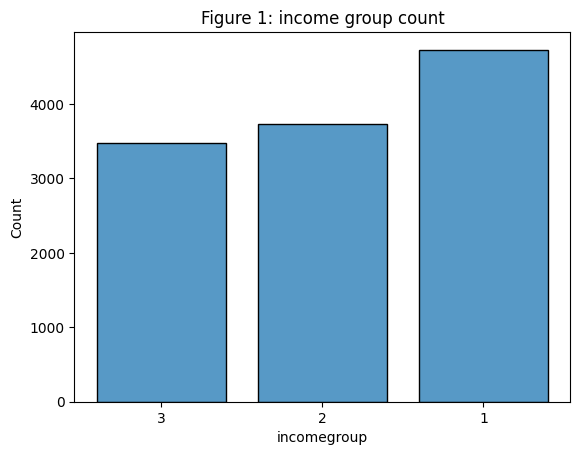

In [50]:
# get distribution of income group
# create a copy to not change original
# change to str because original int will cause display issue in graph
d_copy = dataset.copy()
d_copy['incomegroup'] = d_copy['incomegroup'].astype('str')

sns.histplot(
    data=d_copy,
    x="incomegroup", multiple="dodge", shrink=.8
).set_title('Figure 1: income group count')

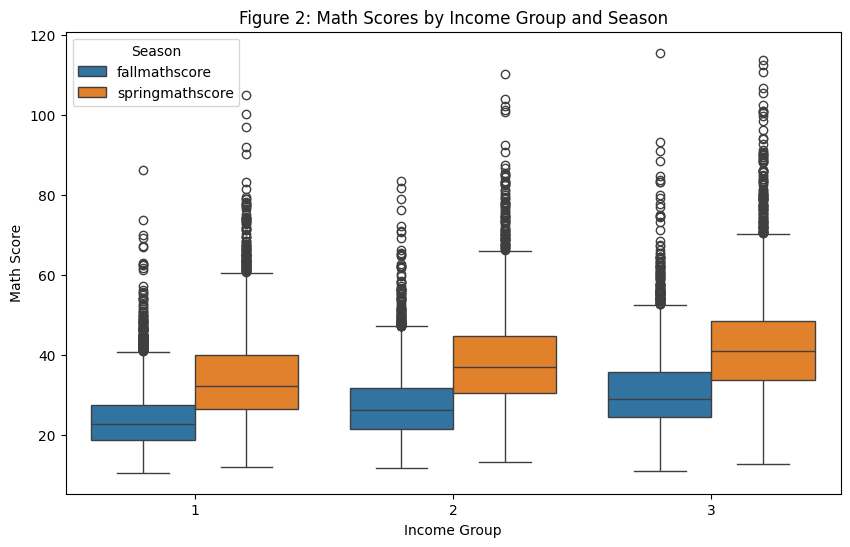

In [ ]:
# Reshape the dataframe to have a single 'mathscore' column and a 'season' column to display as boxplot
df_math = pd.melt(dataset, id_vars=['incomegroup'], value_vars=['fallmathscore', 'springmathscore'],
                     var_name='season', value_name='mathscore')
# Create boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_math, x='incomegroup', y='mathscore', hue='season')
plt.title('Figure 2: Math Scores by Income Group and Season')
plt.xlabel('Income Group')
plt.ylabel('Math Score')
plt.legend(title='Season')
plt.show()

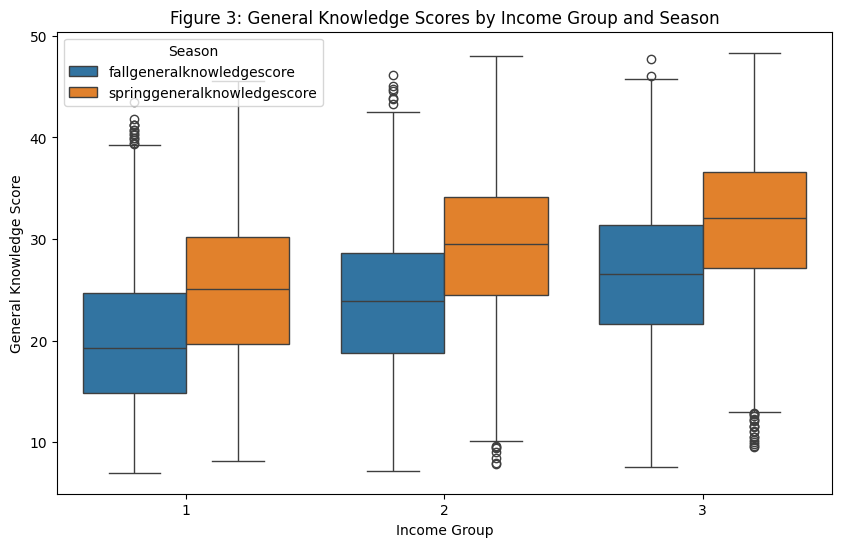

In [ ]:
# Reshape the dataframe to have a single 'generalknowledgescore' column and a 'season' column to display as boxplot
df_gk = pd.melt(dataset, id_vars=['incomegroup'], value_vars=['fallgeneralknowledgescore', 'springgeneralknowledgescore'],
                     var_name='season', value_name='generalknowledgescore')
# Create boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_gk, x='incomegroup', y='generalknowledgescore', hue='season')
plt.title('Figure 3: General Knowledge Scores by Income Group and Season')
plt.xlabel('Income Group')
plt.ylabel('General Knowledge Score')
plt.legend(title='Season')
plt.show()

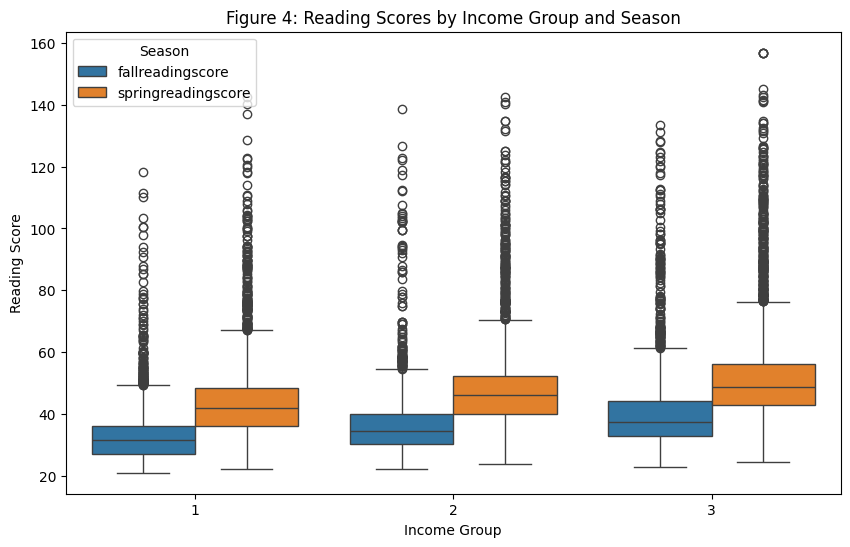

In [ ]:
# Reshape the dataframe to have a single 'readingscore' column and a 'season' column to display as boxplot
df_read = pd.melt(dataset, id_vars=['incomegroup'], value_vars=['fallreadingscore', 'springreadingscore'],
                     var_name='season', value_name='readingscore')
# Create boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_read, x='incomegroup', y='readingscore', hue='season')
plt.title('Figure 4: Reading Scores by Income Group and Season')
plt.xlabel('Income Group')
plt.ylabel('Reading Score')
plt.legend(title='Season')
plt.show()

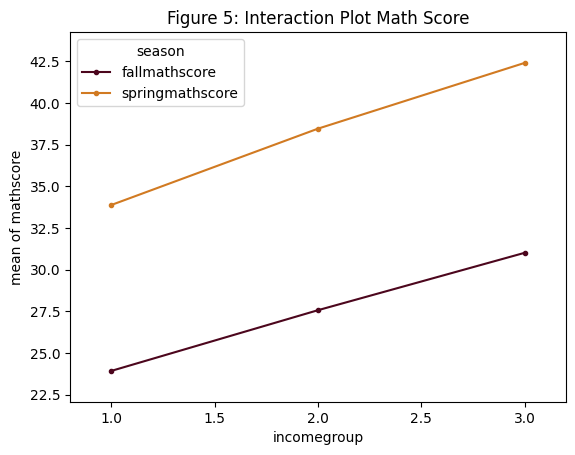

In [ ]:
# interaction plot for math score
fig = interaction_plot(x=df_math['incomegroup'],trace=df_math['season'],response=df_math['mathscore'],colors=['#4c061d','#d17a22'])
plt.title('Figure 5: Interaction Plot Math Score')
plt.show()

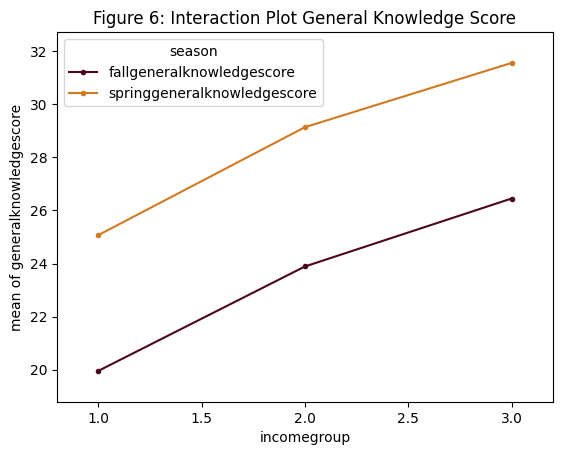

In [ ]:
# interaction plot for general knowledge
fig = interaction_plot(x=df_gk['incomegroup'],trace=df_gk['season'],response=df_gk['generalknowledgescore'],colors=['#4c061d','#d17a22'])
plt.title('Figure 6: Interaction Plot General Knowledge Score')
plt.show()

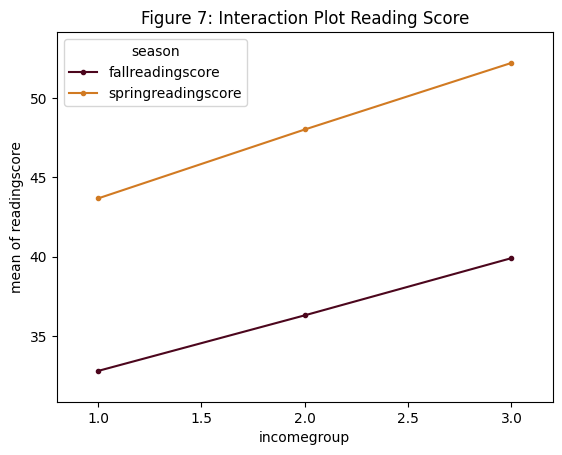

In [ ]:
# interaction plot for reading score
fig = interaction_plot(x=df_read['incomegroup'],trace=df_read['season'],response=df_read['readingscore'],colors=['#4c061d','#d17a22'])
plt.title('Figure 7: Interaction Plot Reading Score')
plt.show()

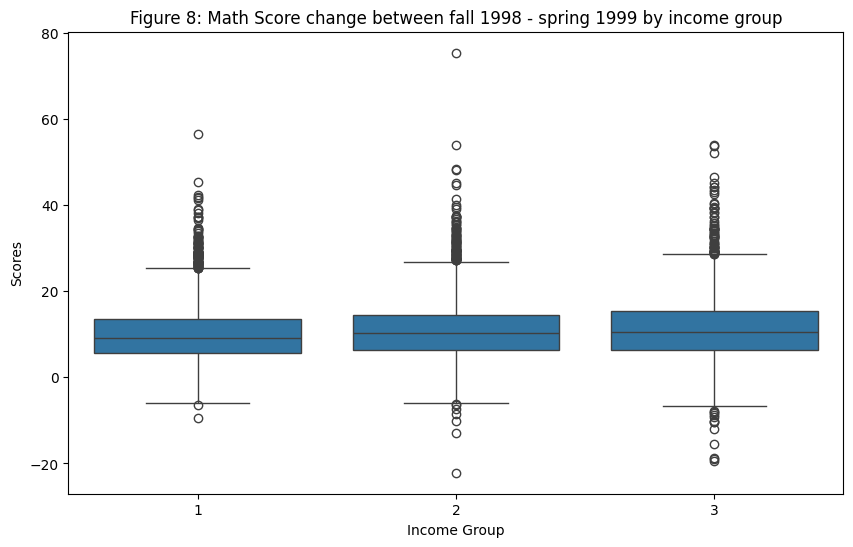

In [13]:
# create a copy to not change original
d_copy = dataset.copy()
d_copy['mathdiffscore'] = d_copy['springmathscore'] - d_copy['fallmathscore']
d_copy['readdiffscore'] = d_copy['springreadingscore'] - d_copy['fallreadingscore']

# Create boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=d_copy, x='incomegroup', y='mathdiffscore')
plt.title('Figure 8: Math Score change between fall 1998 - spring 1999 by income group')
plt.xlabel('Income Group')
plt.ylabel('Scores')
plt.show()

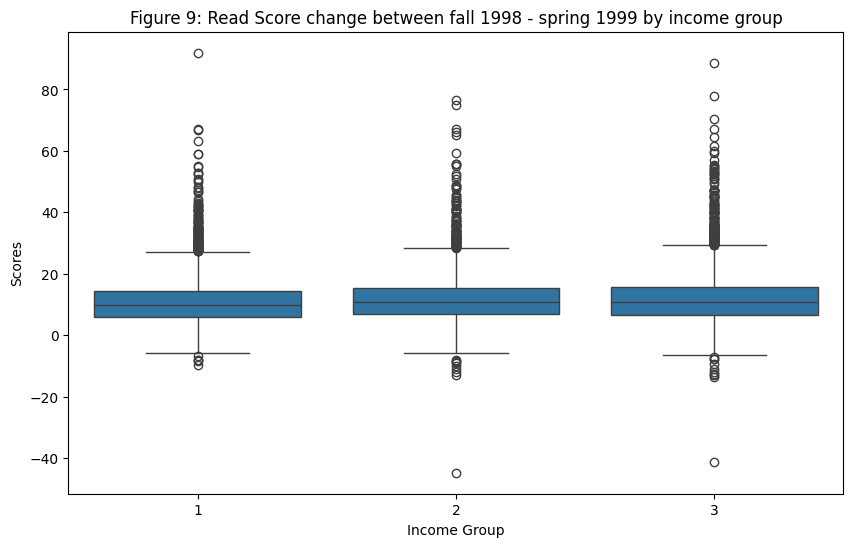

In [14]:
# Create boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=d_copy, x='incomegroup', y='readdiffscore')
plt.title('Figure 9: Read Score change between fall 1998 - spring 1999 by income group')
plt.xlabel('Income Group')
plt.ylabel('Scores')
plt.show()

In [16]:
# ANCOVA (math score difference)
# different ways of running (pingouin)
ancova(data=d_copy, dv='mathdiffscore', covar='fallgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,55.879616,2,0.624286,5.356614e-01,0.000105
1,fallgeneralknowledgescore,22425.932956,1,501.083959,9.425259e-109,0.040312
2,Residual,533880.499781,11929,NaN,NaN,NaN


In [24]:
# different way of running (ols)
model_math = ols('mathdiffscore ~ C(incomegroup) + fallgeneralknowledgescore', data=d_copy).fit()
anova_table = sm.stats.anova_lm(model_math, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(incomegroup),55.879616,2.0,0.624286,5.356614e-01
fallgeneralknowledgescore,22425.932956,1.0,501.083959,9.425259e-109
Residual,533880.499781,11929.0,NaN,NaN


In [25]:
# different way of running (bioinfokit)
res = stat()
res.anova_stat(df=d_copy, res_var='mathdiffscore', anova_model='mathdiffscore ~ C(incomegroup) + fallgeneralknowledgescore')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(incomegroup),2.0,55.879616,27.939808,0.624286,5.356614e-01
fallgeneralknowledgescore,1.0,22425.932956,22425.932956,501.083959,9.425259e-109
Residual,11929.0,533880.499781,44.754841,NaN,NaN


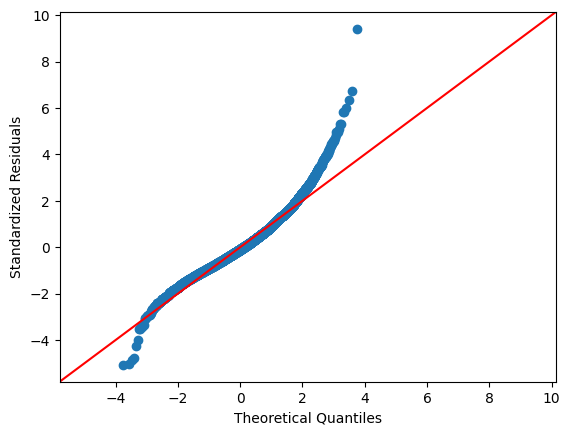

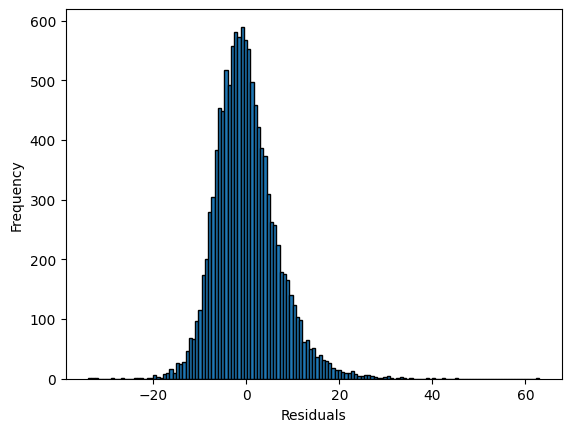

In [28]:
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANCOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [30]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model_math.resid)
print(w,pvalue)

0.9664044380187988 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [32]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=d_copy, res_var='mathdiffscore', xfac_var='incomegroup')
res.levene_summary

,Parameter,Value
0,Test statistics (W),22.2152
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [33]:
# ANCOVA (read score difference)
# different ways of running (pingouin)
ancova(data=d_copy, dv='readdiffscore', covar='fallgeneralknowledgescore', between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,287.485906,2,2.251247,1.053126e-01,0.000377
1,fallgeneralknowledgescore,14054.124684,1,220.110317,2.354473e-49,0.018117
2,Residual,761671.036393,11929,NaN,NaN,NaN


In [42]:
# different way of running (ols)
model_read = ols('readdiffscore ~ C(incomegroup) + fallgeneralknowledgescore', data=d_copy).fit()
anova_table = sm.stats.anova_lm(model_math, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(incomegroup),287.485906,2.0,2.251247,1.053126e-01
fallgeneralknowledgescore,14054.124684,1.0,220.110317,2.354473e-49
Residual,761671.036393,11929.0,NaN,NaN


In [48]:
# different way of running (bioinfokit)
res = stat()
res.anova_stat(df=d_copy, res_var='readdiffscore', anova_model='readdiffscore ~ C(incomegroup) + fallgeneralknowledgescore')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(incomegroup),2.0,287.485906,143.742953,2.251247,1.053126e-01
fallgeneralknowledgescore,1.0,14054.124684,14054.124684,220.110317,2.354473e-49
Residual,11929.0,761671.036393,63.850368,NaN,NaN


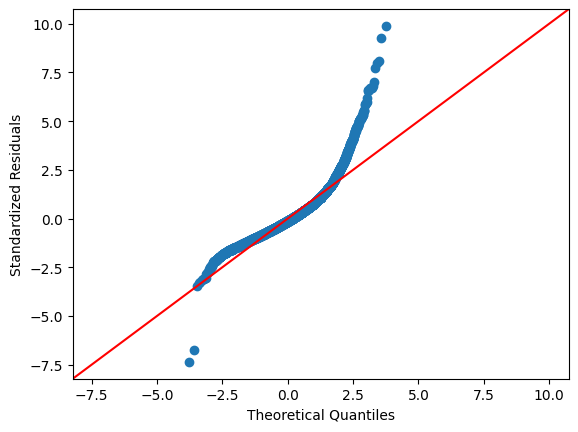

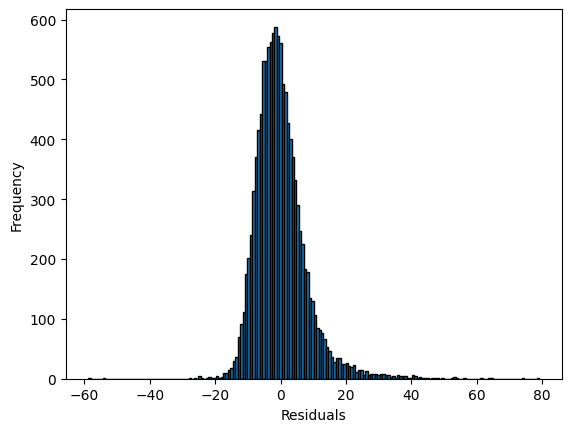

In [49]:
# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANCOVA
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [45]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model_read.resid)
print(w,pvalue)

0.8996317386627197 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [47]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=d_copy, res_var='readdiffscore', xfac_var='incomegroup')
res.levene_summary

,Parameter,Value
0,Test statistics (W),19.728
1,Degrees of freedom (Df),2.000
2,p value,0.000
